In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from Util import loadBeerRaw,loadWine
from sklearn.preprocessing import LabelEncoder



In [53]:
X_train, X_test, y_train, y_test= loadBeerRaw()
pca = PCA(n_components=3)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
principalComponents =pca.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']])

In [54]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [55]:
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-23.302837,-5.467786,22.718425
1,-21.714548,-35.967880,-18.345169
2,-20.003542,4.004444,-3.747846
3,-39.583803,41.155142,-3.707839
4,-21.656113,8.975191,-0.405950


In [56]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Style
0,-23.302837,-5.467786,22.718425,NaN
1,-21.714548,-35.967880,-18.345169,Cream Ale
2,-20.003542,4.004444,-3.747846,Holiday/Winter Special Spiced Beer
3,-39.583803,41.155142,-3.707839,American IPA
4,-21.656113,8.975191,-0.405950,NaN


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


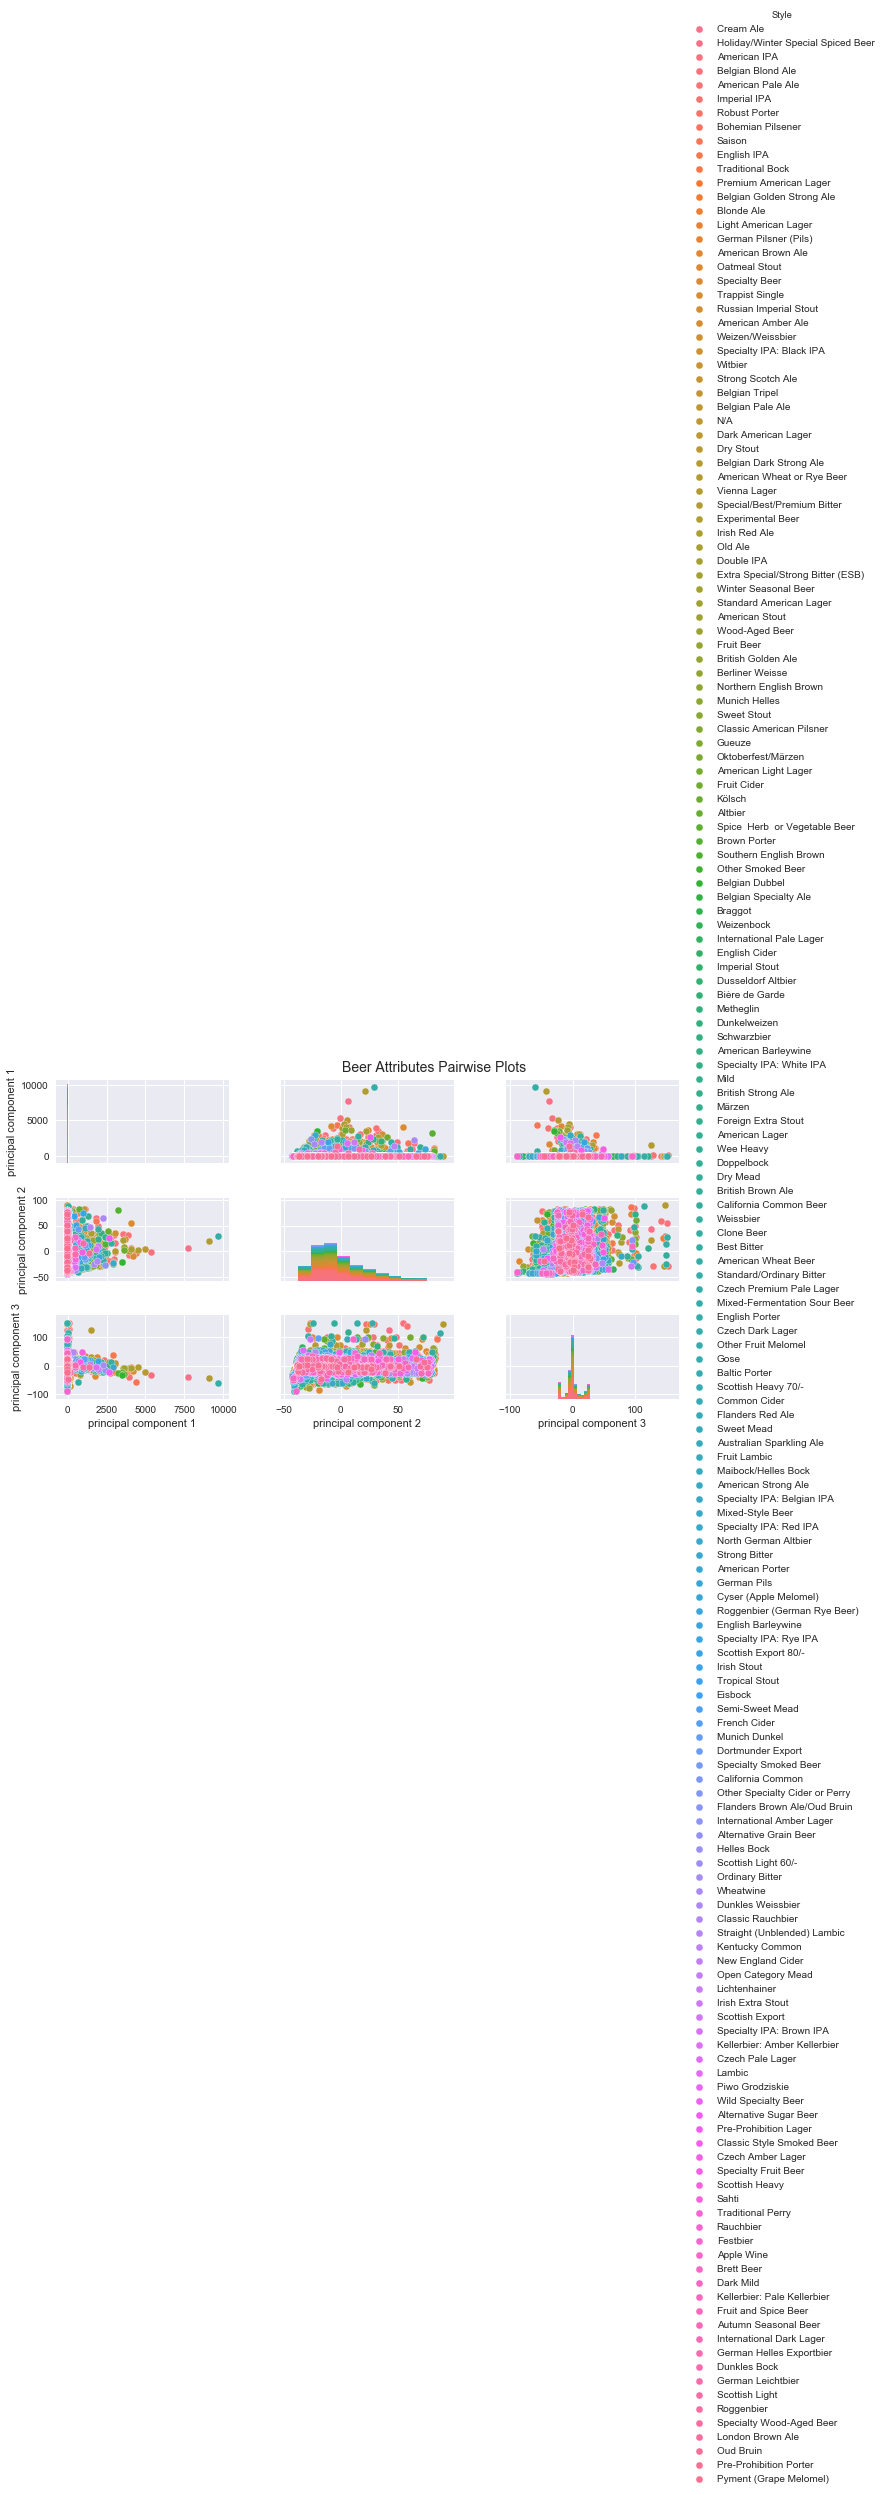

In [57]:
pp = sns.pairplot(finalDf, hue='Style', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)